In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
dataset=pd.read_csv('D:\ExcelR_Assig_PDF\Linear regression\delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


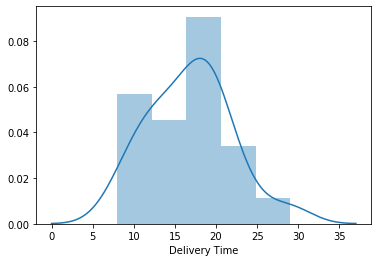

In [8]:
sns.distplot(dataset['Delivery Time'])

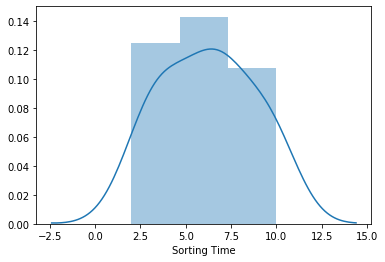

In [9]:
sns.distplot(dataset['Sorting Time'])

In [10]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


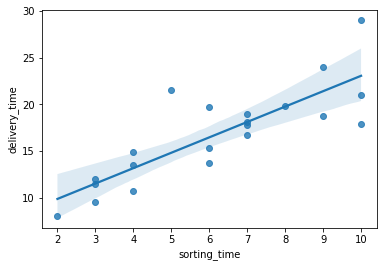

In [12]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [13]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

In [14]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [15]:
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [16]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [20]:
delivery_time = (19.83) + (1.649020)*(8)
delivery_time

33.02216

In [26]:
data_pred=pd.DataFrame(dataset,columns=['sorting_time'])
data_pred

,sorting_time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [27]:
model.predict(data_pred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [35]:
new_data=pd.Series([5,8,10.98,18,7.5,6])
new_data

0     5.00
1     8.00
2    10.98
3    18.00
4     7.50
5     6.00
dtype: float64

In [36]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5.00
1,8.00
2,10.98
3,18.00
4,7.50
5,6.00


In [37]:
model.predict(data_pred)

0    14.827833
1    19.774893
2    24.688972
3    36.265092
4    18.950383
5    16.476853
dtype: float64